In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [154]:
df = pd.read_csv('ocs_cleaned.csv')

In [155]:
df.potency = df.potency.astype('category')
df.producer = df.producer.astype('category')
df.brand = df.brand.astype('category')
df.type = df.type.astype('category')

In [156]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

name               object
type                 int8
producer             int8
brand                int8
potency              int8
thc_min           float64
thc_max           float64
cbd_min           float64
cbd_max           float64
price             float64
price_per_gram    float64
grams             float64
dtype: object

In [157]:
X = df.drop(columns = ["name", "price"])
# X_dum = pd.get_dummies(X)
y = df.price

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Multiple Linear Regression

In [159]:
reg = linear_model.LinearRegression()
print(np.mean(cross_val_score(reg, X_train, y_train, cv=3)))

0.9107166701756425


In [160]:
y_pred = reg.fit(X_train, y_train).predict(X_test)
mean_absolute_error(y_test, y_pred)

8.152250586638043

In [161]:
reg.fit(X_train, y_train).score(X_test, y_test)

0.8672983700491061

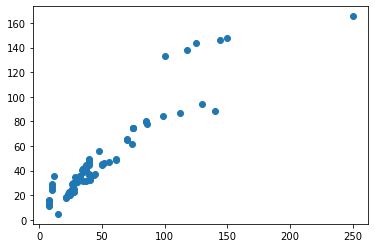

In [163]:
plt.scatter(y = y_pred,x = y_test)

#### Lasso Regression

In [164]:
las = linear_model.Lasso()
print(np.mean(cross_val_score(reg, X_train, y_train, cv=3)))

0.9107166701756425


In [165]:
y_pred = las.fit(X_train, y_train).predict(X_test)
mean_absolute_error(y_test, y_pred)

7.5681888734071

In [166]:
las.fit(X_train, y_train).score(X_test, y_test)

0.8681826527314723

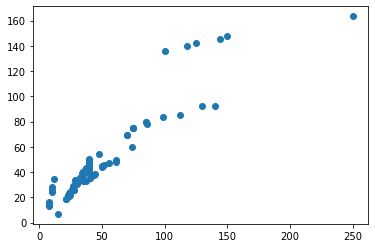

In [167]:
plt.scatter(y = y_pred,x = y_test)

#### Random Forest

In [168]:
rf = RandomForestRegressor()

In [169]:
print(np.mean(cross_val_score(rf, X_train, y_train, cv = 3)))

0.9936579746157678


In [170]:
y_pred = rf.fit(X_train, y_train).predict(X_test)
mean_absolute_error(y_test, y_pred)

0.8532945652173937

In [171]:
rf.fit(X_train, y_train).score(X_test, y_test)

0.9956238169289777

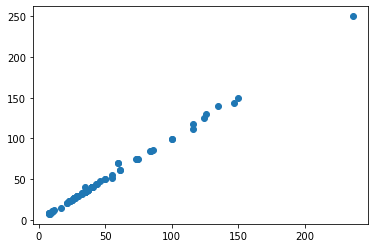

In [172]:
plt.scatter(y_pred,y_test)